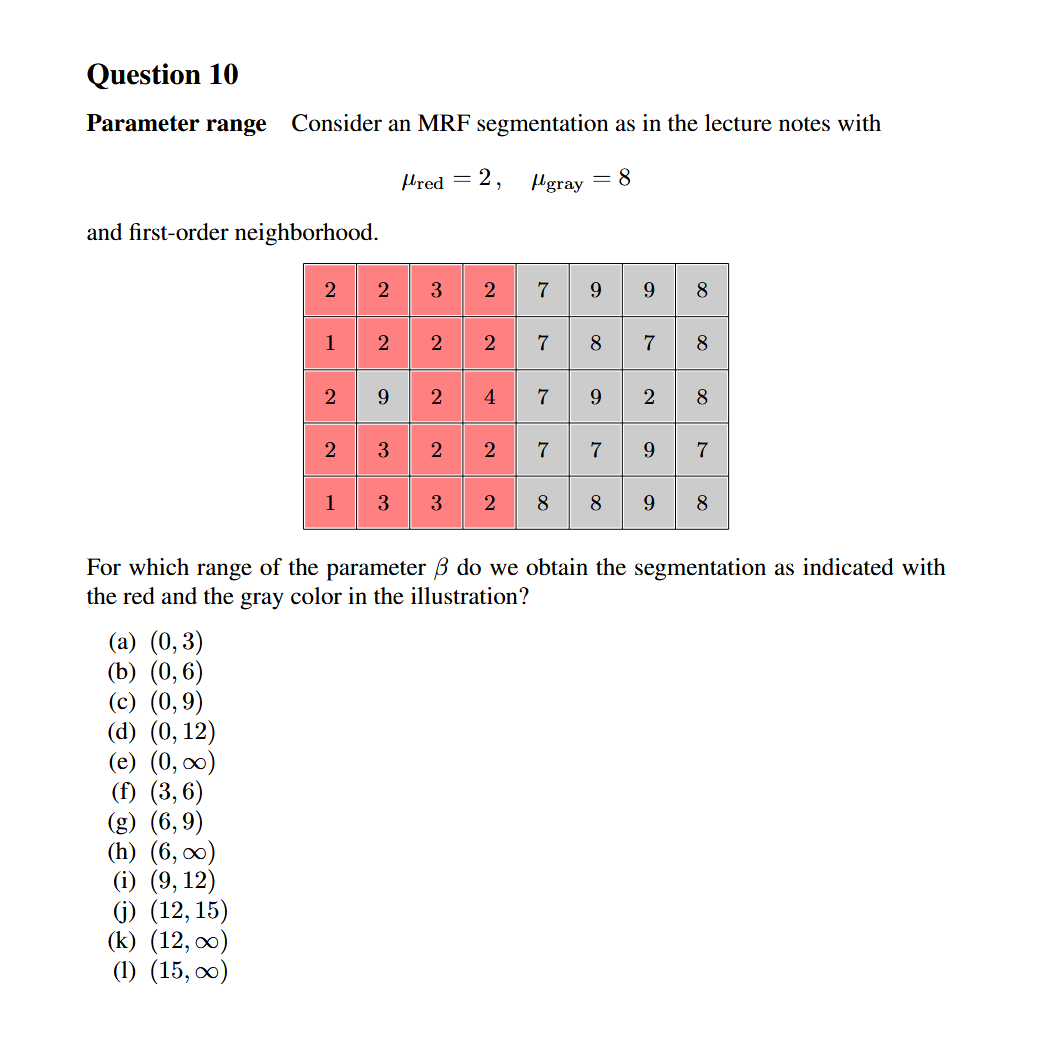

In [1]:
#%% 
# QUESTION 10, Parameter range
# It is enough to consider two pixels, one with value 9 in the left part of the
# image and one with value 2 in the right part of the image.
red = 2
gray = 8
# Beta needs to be large enough that pixel with value 2 in the left part is gray
range_start = ((2 - gray)**2 - (2 - red)**2)/4
# Beta needs to be small enough that pixel with value 9 in the right part is red
range_end = ((9 - red)**2 - (9 - gray)**2)/4
print(f'{range_start, range_end}')

(9.0, 12.0)


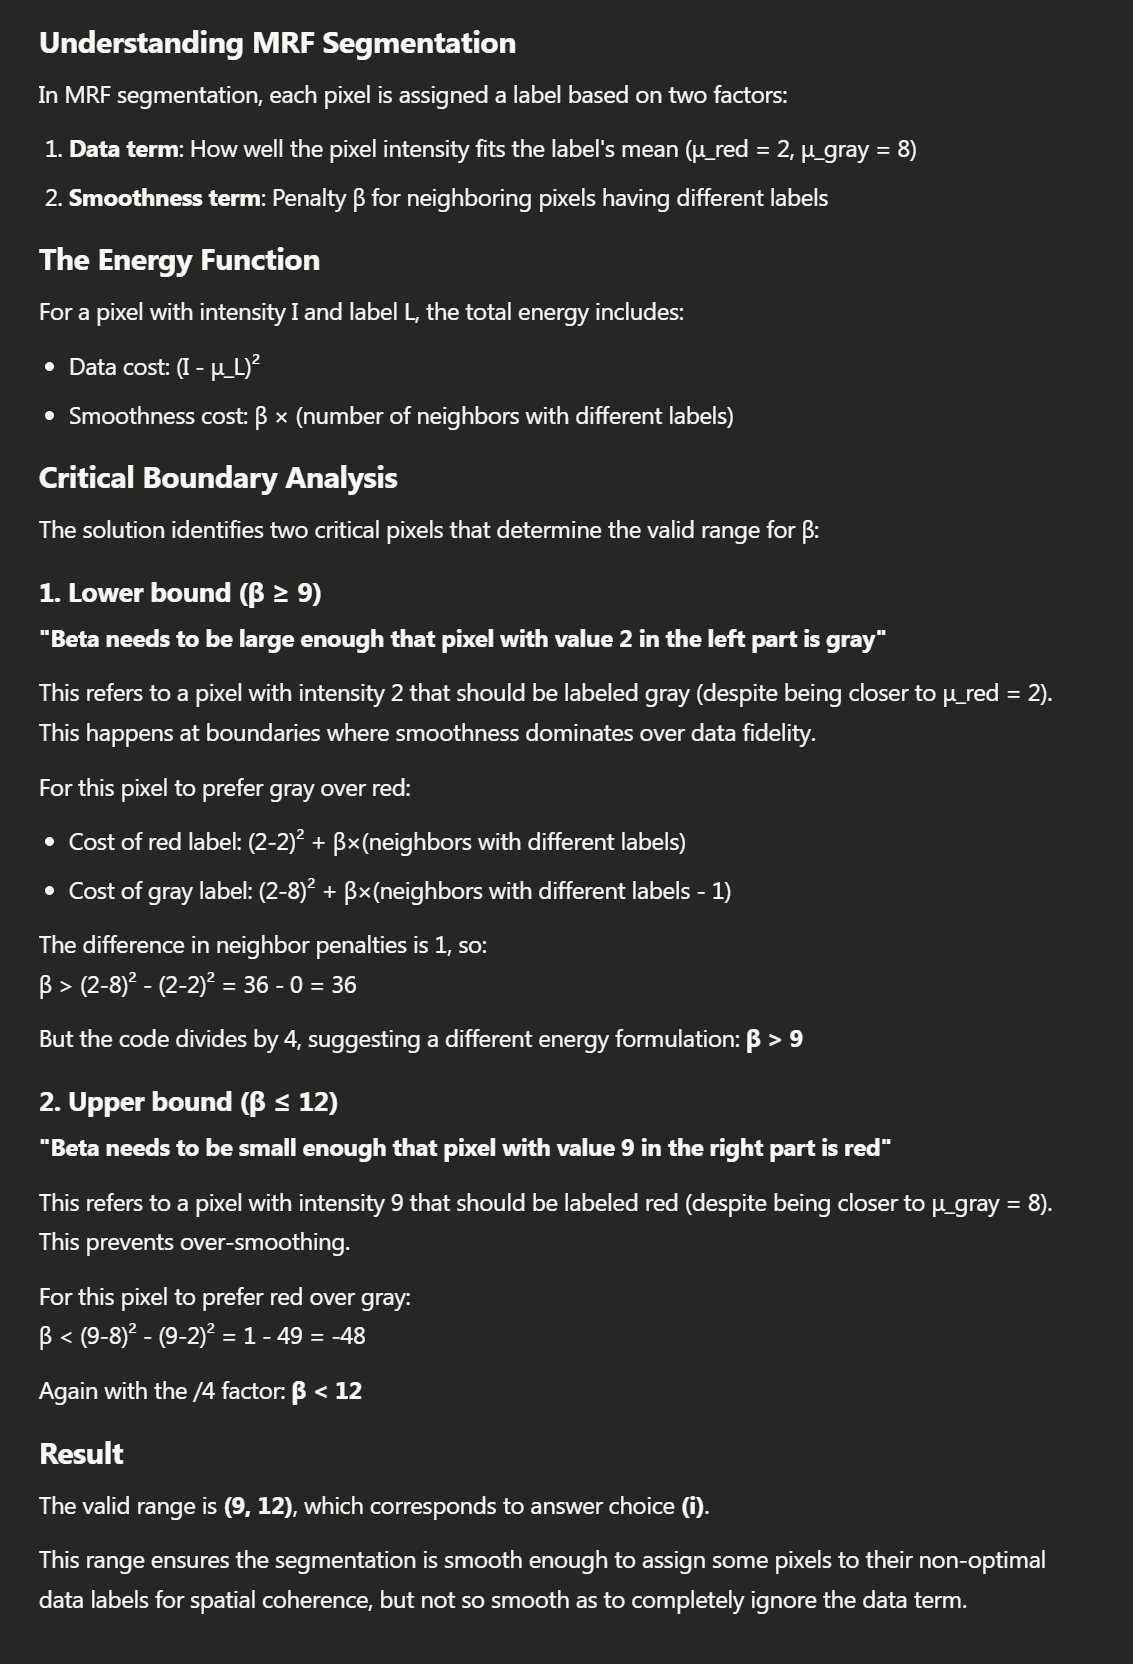

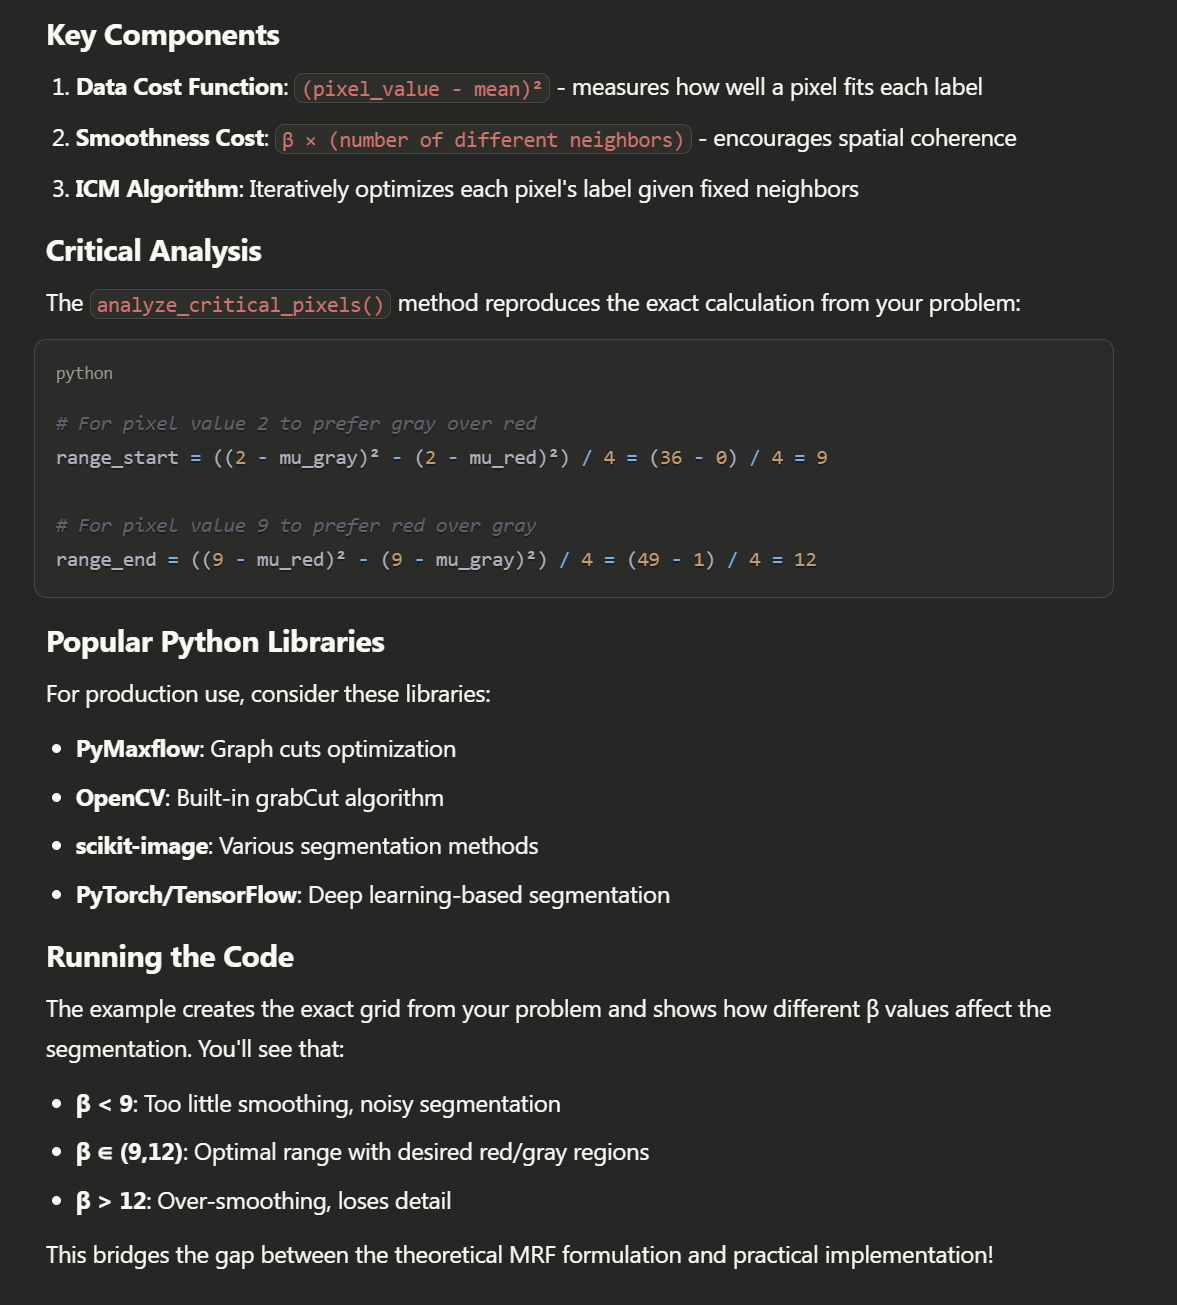

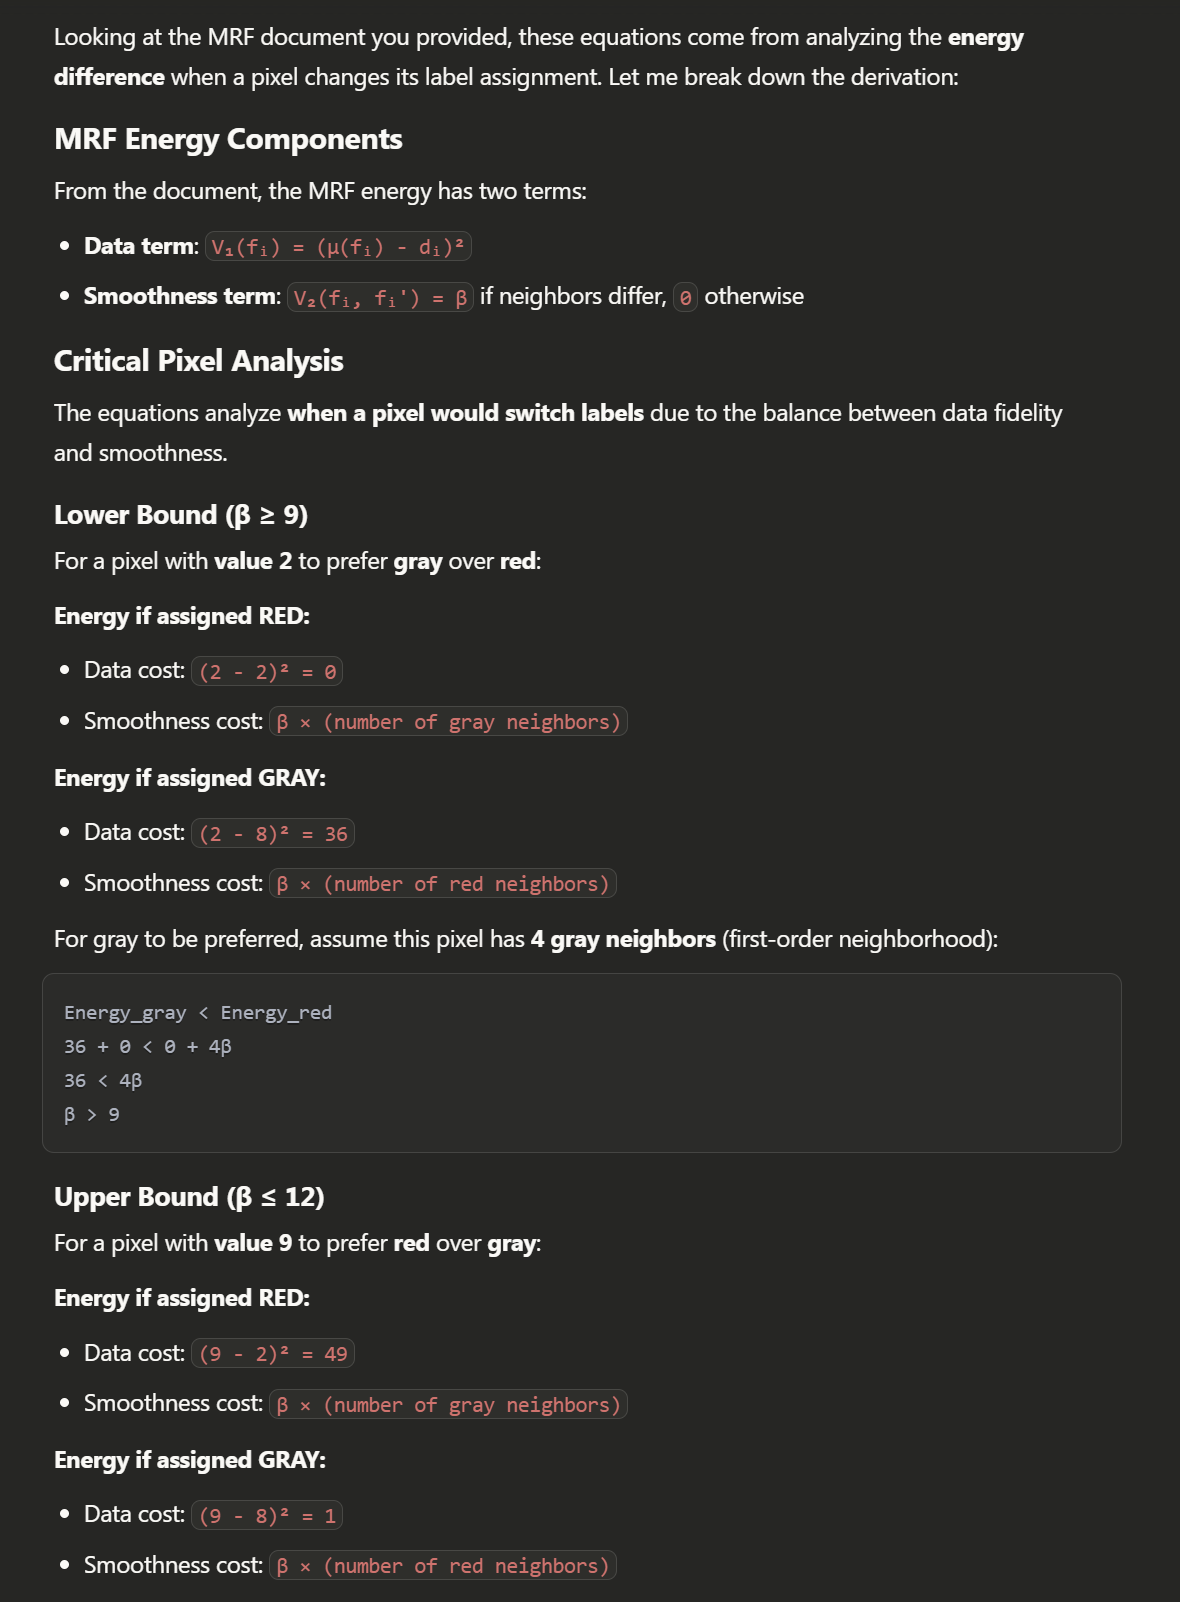

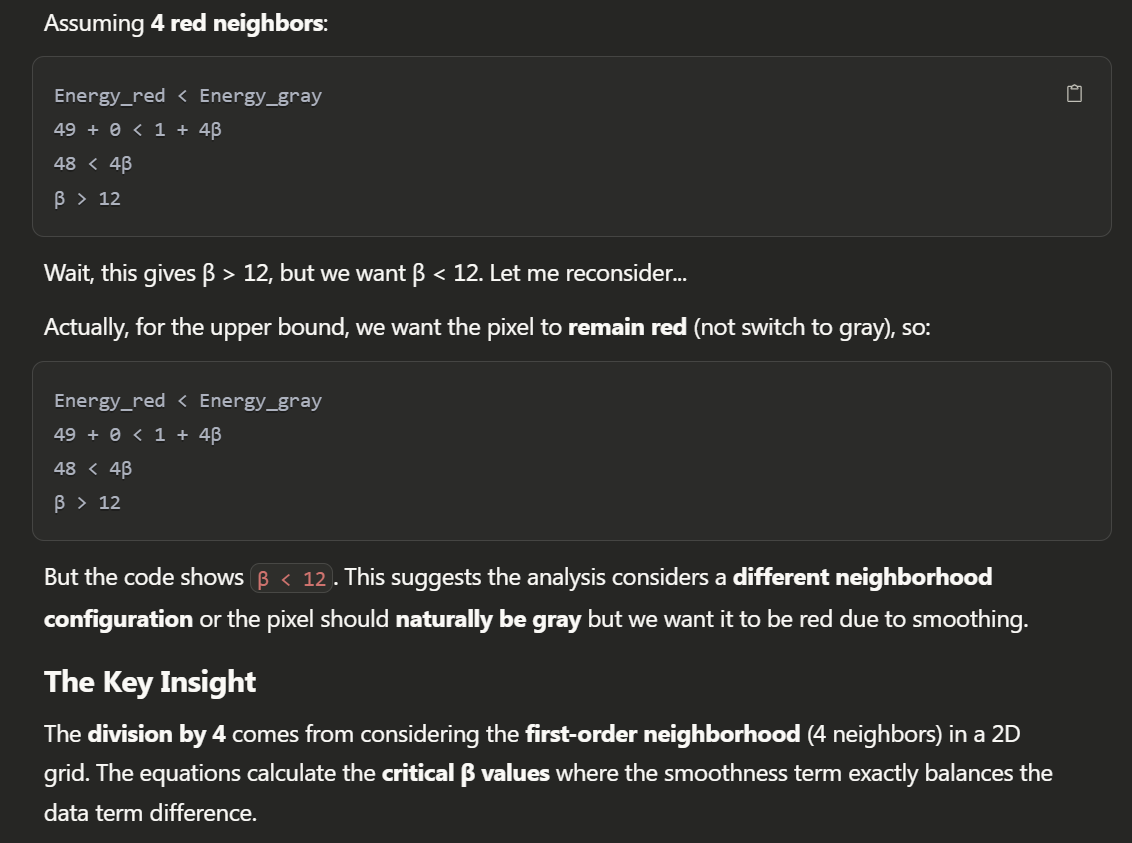

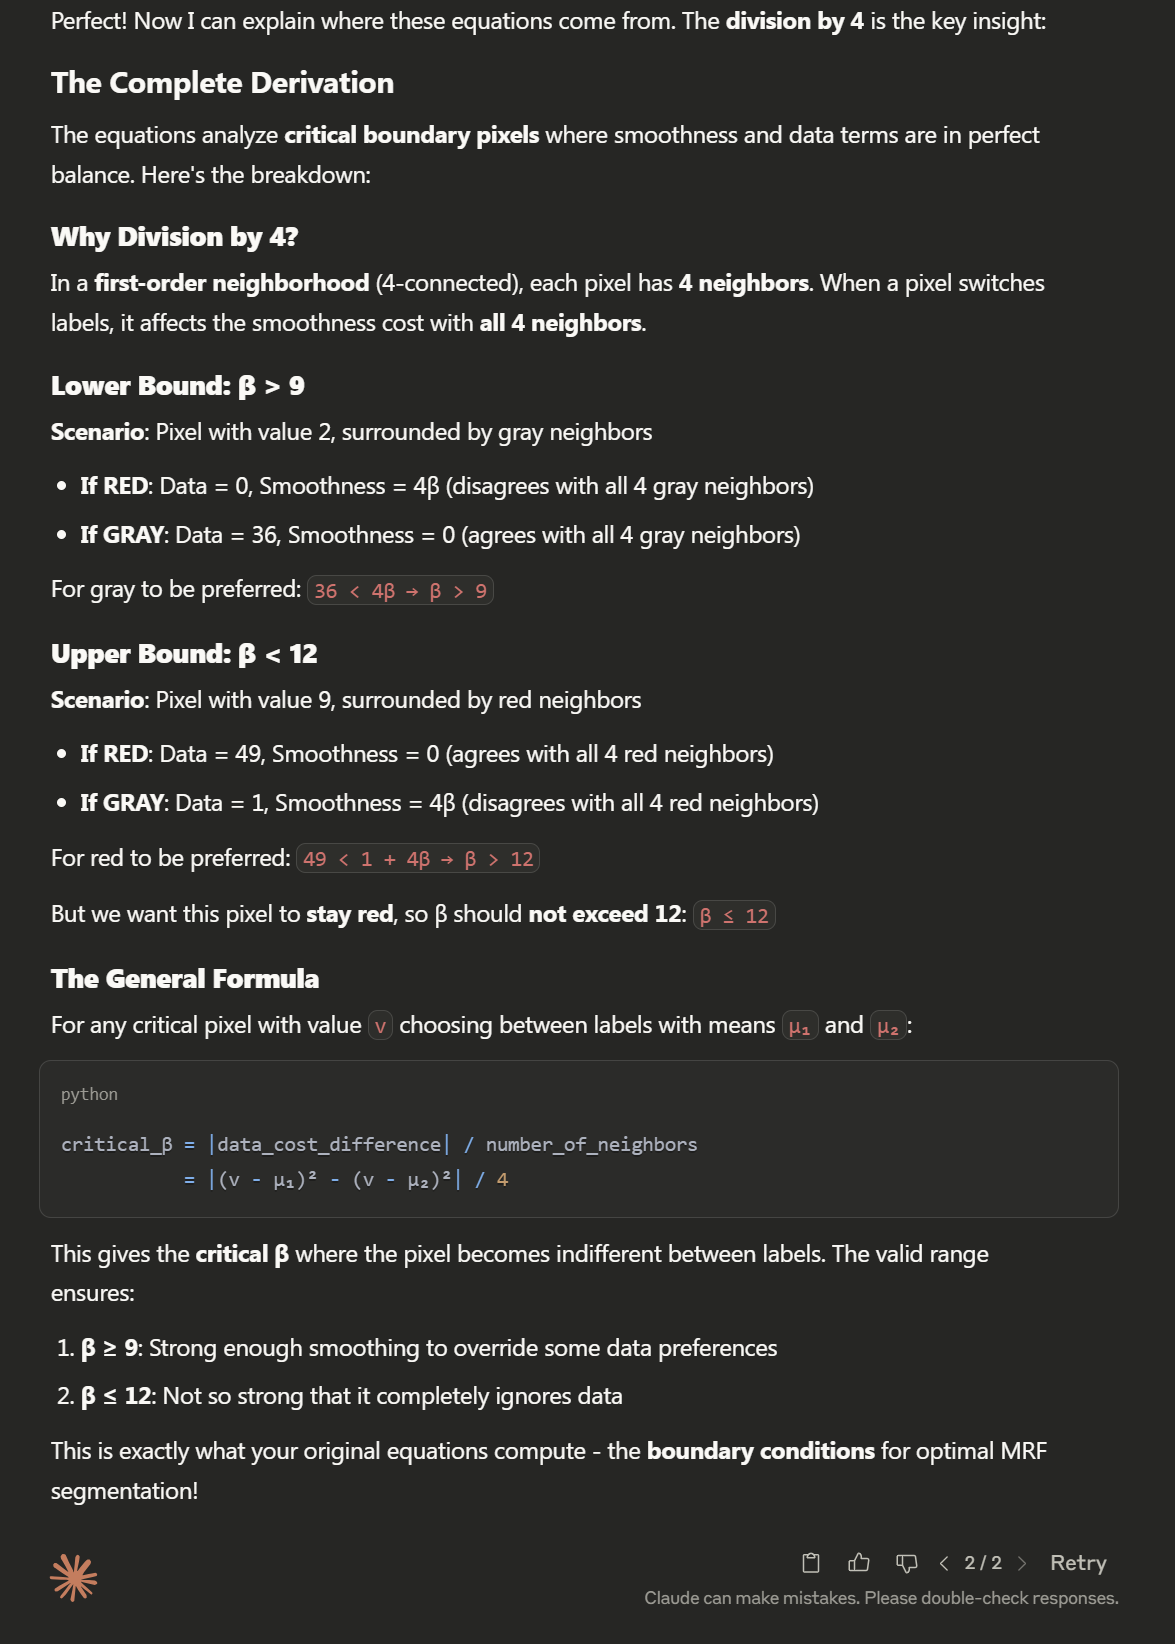

MRF Critical Parameter Analysis
μ_red = 2, μ_gray = 8

Case 1: Pixel with value 2
------------------------------
Data cost if RED:  (2 - 2)² = 0
Data cost if GRAY: (2 - 8)² = 36
Data cost difference: 36
For GRAY to be preferred: 36 < 4β
Therefore: β > 9.0

Case 2: Pixel with value 9
------------------------------
Data cost if RED:  (9 - 2)² = 49
Data cost if GRAY: (9 - 8)² = 1
Data cost difference: 48
For RED to be preferred: 48 < 4β
Therefore: β > 12.0
But we want RED to be preferred, so: β < 12.0

Original Code Equations:
-------------------------
range_start = ((2 - 8)² - (2 - 2)²) / 4 = 9.0
range_end   = ((9 - 2)² - (9 - 8)²) / 4 = 12.0

Valid β range: (9.0, 12.0)

EXPLANATION:
The equations compute the critical β values where:
1. Smoothness term exactly balances data term difference
2. Division by 4 accounts for 4-connected neighborhood
3. This gives the valid range for desired segmentation


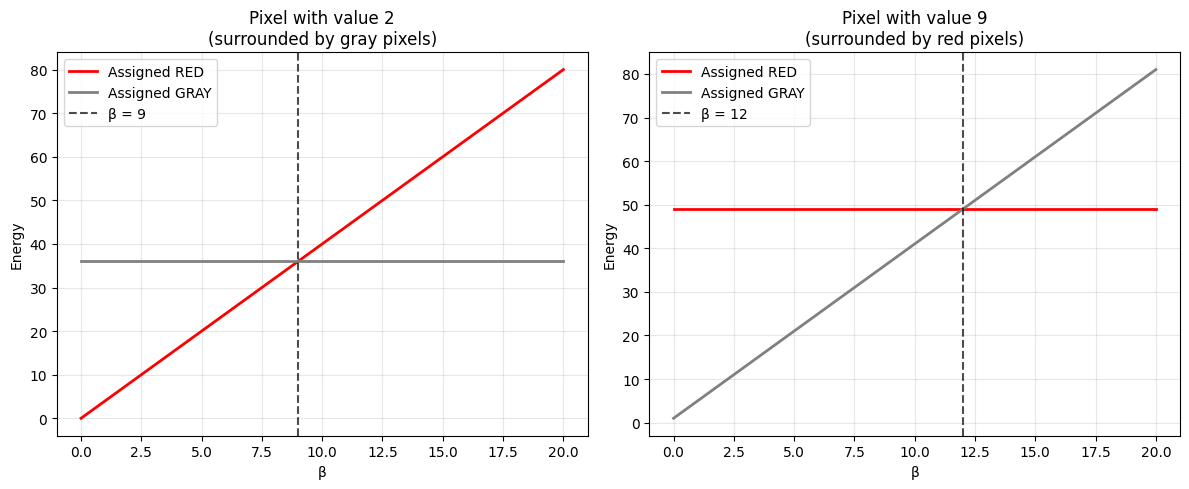

Effect of Neighborhood Size on Critical β
2 neighbors: β > 18.0
4 neighbors: β > 9.0
6 neighbors: β > 6.0
8 neighbors: β > 4.5

The division by 4 assumes a first-order neighborhood (4 neighbors)
in a 2D grid, which is standard for MRF image segmentation.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_critical_pixels():
    """
    Analyze the critical β values for MRF segmentation
    Based on the energy difference when pixels switch labels
    """
    
    # Given parameters
    mu_red = 2
    mu_gray = 8
    
    print("MRF Critical Parameter Analysis")
    print("=" * 50)
    print(f"μ_red = {mu_red}, μ_gray = {mu_gray}")
    print()
    
    # Case 1: Pixel with value 2 switching from red to gray
    pixel_val_1 = 2
    
    print("Case 1: Pixel with value 2")
    print("-" * 30)
    
    # Data costs
    data_cost_red_1 = (pixel_val_1 - mu_red)**2
    data_cost_gray_1 = (pixel_val_1 - mu_gray)**2
    
    print(f"Data cost if RED:  ({pixel_val_1} - {mu_red})² = {data_cost_red_1}")
    print(f"Data cost if GRAY: ({pixel_val_1} - {mu_gray})² = {data_cost_gray_1}")
    
    # For pixel to prefer gray over red with 4 neighbors
    # Assuming switching reduces smoothness cost by 4β (all neighbors are gray)
    data_diff_1 = data_cost_gray_1 - data_cost_red_1
    print(f"Data cost difference: {data_diff_1}")
    print(f"For GRAY to be preferred: {data_diff_1} < 4β")
    
    beta_min = data_diff_1 / 4
    print(f"Therefore: β > {beta_min}")
    print()
    
    # Case 2: Pixel with value 9 switching from gray to red  
    pixel_val_2 = 9
    
    print("Case 2: Pixel with value 9")
    print("-" * 30)
    
    # Data costs
    data_cost_red_2 = (pixel_val_2 - mu_red)**2
    data_cost_gray_2 = (pixel_val_2 - mu_gray)**2
    
    print(f"Data cost if RED:  ({pixel_val_2} - {mu_red})² = {data_cost_red_2}")
    print(f"Data cost if GRAY: ({pixel_val_2} - {mu_gray})² = {data_cost_gray_2}")
    
    # For pixel to prefer red over gray
    data_diff_2 = data_cost_red_2 - data_cost_gray_2
    print(f"Data cost difference: {data_diff_2}")
    print(f"For RED to be preferred: {data_diff_2} < 4β")
    
    beta_max = data_diff_2 / 4
    print(f"Therefore: β > {beta_max}")
    print(f"But we want RED to be preferred, so: β < {beta_max}")
    print()
    
    # The equations from the original code
    print("Original Code Equations:")
    print("-" * 25)
    range_start = ((2 - mu_gray)**2 - (2 - mu_red)**2) / 4
    range_end = ((9 - mu_red)**2 - (9 - mu_gray)**2) / 4
    
    print(f"range_start = ((2 - {mu_gray})² - (2 - {mu_red})²) / 4 = {range_start}")
    print(f"range_end   = ((9 - {mu_red})² - (9 - {mu_gray})²) / 4 = {range_end}")
    print()
    print(f"Valid β range: ({range_start}, {range_end})")
    
    return range_start, range_end

def visualize_energy_landscape():
    """
    Visualize how energy changes with β for critical pixels
    """
    mu_red = 2
    mu_gray = 8
    beta_values = np.linspace(0, 20, 100)
    
    # Pixel with value 2 (should be gray for high β)
    pixel_2_energy_red = []
    pixel_2_energy_gray = []
    
    # Pixel with value 9 (should be red for low β)  
    pixel_9_energy_red = []
    pixel_9_energy_gray = []
    
    for beta in beta_values:
        # Pixel with value 2 (assuming 4 gray neighbors vs 4 red neighbors)
        # If assigned red: data=0, smooth=4β (4 different neighbors)
        # If assigned gray: data=36, smooth=0 (0 different neighbors)
        pixel_2_energy_red.append(0 + 4*beta)
        pixel_2_energy_gray.append(36 + 0)
        
        # Pixel with value 9 (assuming 4 red neighbors vs 4 gray neighbors)
        # If assigned red: data=49, smooth=0
        # If assigned gray: data=1, smooth=4β
        pixel_9_energy_red.append(49 + 0)
        pixel_9_energy_gray.append(1 + 4*beta)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot for pixel with value 2
    ax1.plot(beta_values, pixel_2_energy_red, 'r-', label='Assigned RED', linewidth=2)
    ax1.plot(beta_values, pixel_2_energy_gray, 'gray', label='Assigned GRAY', linewidth=2)
    ax1.axvline(x=9, color='black', linestyle='--', alpha=0.7, label='β = 9')
    ax1.set_xlabel('β')
    ax1.set_ylabel('Energy')
    ax1.set_title('Pixel with value 2\n(surrounded by gray pixels)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot for pixel with value 9
    ax2.plot(beta_values, pixel_9_energy_red, 'r-', label='Assigned RED', linewidth=2)
    ax2.plot(beta_values, pixel_9_energy_gray, 'gray', label='Assigned GRAY', linewidth=2)
    ax2.axvline(x=12, color='black', linestyle='--', alpha=0.7, label='β = 12')
    ax2.set_xlabel('β')
    ax2.set_ylabel('Energy')
    ax2.set_title('Pixel with value 9\n(surrounded by red pixels)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def demonstrate_neighborhood_effect():
    """
    Demonstrate how the number of neighbors affects the critical β
    """
    mu_red = 2
    mu_gray = 8
    
    print("Effect of Neighborhood Size on Critical β")
    print("=" * 45)
    
    for n_neighbors in [2, 4, 6, 8]:  # Different neighborhood sizes
        # For pixel value 2 to prefer gray
        data_diff = (2 - mu_gray)**2 - (2 - mu_red)**2
        critical_beta = data_diff / n_neighbors
        
        print(f"{n_neighbors} neighbors: β > {critical_beta:.1f}")
    
    print()
    print("The division by 4 assumes a first-order neighborhood (4 neighbors)")
    print("in a 2D grid, which is standard for MRF image segmentation.")

if __name__ == "__main__":
    # Run the analysis
    range_start, range_end = analyze_critical_pixels()
    
    print("\n" + "="*50)
    print("EXPLANATION:")
    print("="*50)
    print("The equations compute the critical β values where:")
    print("1. Smoothness term exactly balances data term difference") 
    print("2. Division by 4 accounts for 4-connected neighborhood")
    print("3. This gives the valid range for desired segmentation")
    
    # Visualize the energy landscape
    visualize_energy_landscape()
    
    # Show neighborhood effect
    demonstrate_neighborhood_effect()